# Flooding Hazard
This notebook calculates the urban risk index for Flooding (FLD)
hazard.  The URI calculation has three components: expected loss, social vulnerability, and resilience capacity.  

## 1. Expected Loss
The FLD hazard expected loss (ESL) includes consequences for the following receptors and marginal losses.
 * Building / HAZUS losses
 * People / Dislocation

#### 1a. People / Dislocation
Coastal flooding simulations that predict the maximum depth of flooding across NYC for different category storms 
were used to estimate the annualized risk of dislocation.  FEMA values were used to valuate dislocation assuming an average 
duration of 30 days.  

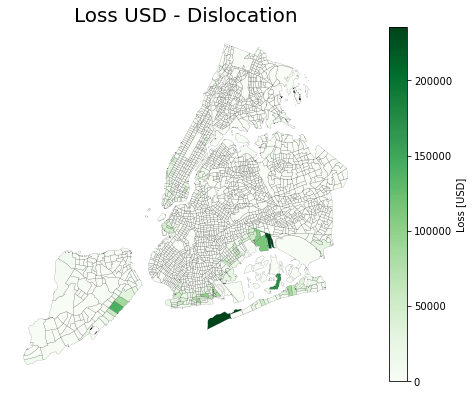

In [1]:
from MISC import params_1 as params
from MISC import utils_1 as utils
from MISC import plotting_1 as plotting
import CLASSES
from CLASSES import class_EL_SV_CR_1 as URI
import matplotlib.pyplot as plt
import geopandas as gpd
import os
utils.set_home()
hazard_name = "FLD"

#all loss to ESL class
path_loss =   params.PATHNAMES.at['ESL_CST_dislocation_loss', 'Value']
gdf_loss = gpd.read_file(path_loss)
ESL = URI.ESL(hazard_name = hazard_name)
ESL.add_consequence("Disloc", "People", gdf_loss)
#plot
plotting.plot_ESL_nb(hazard_name, ESL.consequence["Disloc"]["map_tract"], 'Loss USD - Dislocation')

#### 1b. Buildings / Flooding
A HAZUS simulation was used to calculate annualized losses to property due to flooding.  

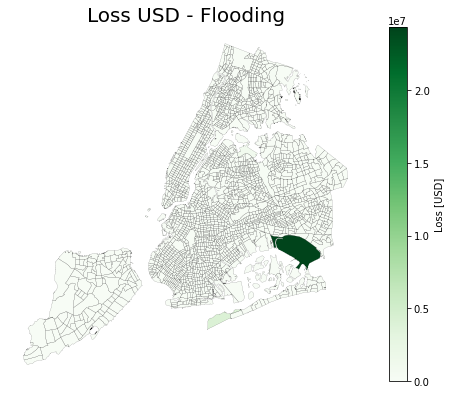

In [2]:
#all loss to ESL class
path_loss =   params.PATHNAMES.at['ESL_FLD_hazus_loss', 'Value']
gdf_loss = gpd.read_file(path_loss)
ESL.add_consequence("Flood", "Buildings", gdf_loss)
#plot
plotting.plot_ESL_nb(hazard_name, ESL.consequence["Flood"]["map_tract"], 'Loss USD - Flooding')

#### 1c. Expected Loss Total
The total expected losses are the sum of losses from each individual consequence.  

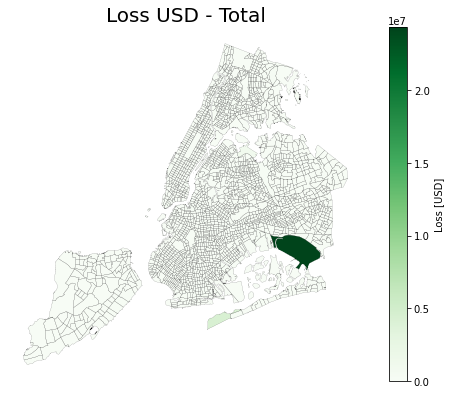

In [3]:
#save result
path_save = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\ESL\ESL_{}_tract.shp'.format(hazard_name, hazard_name)
ESL.ESL_map.to_file(path_save)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.ESL_map, 'Loss USD - Total')



## 2. Social Vulnerability Score
The Social Vulnerability is based on the CDC social vulnerability index.  

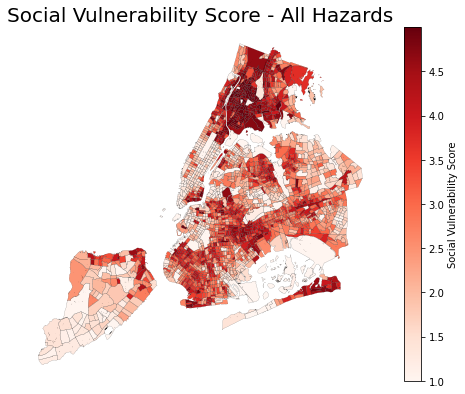

In [4]:
path_SOV = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\\SOV\SOV_tract.shp'
gdf_SOV = gpd.read_file(path_SOV)
SOV = URI.SOV(hazard_name = hazard_name, map_tract = gdf_SOV)


#plot
plotting.plot_SOV_nb(SOV.SOV_map)

## 3. Resilience Capacity Score
The Resilience Capacity is the sum of four scores:
- Community capital
- Mitigation Landscape
- Response Capacity
- Recovery Resources


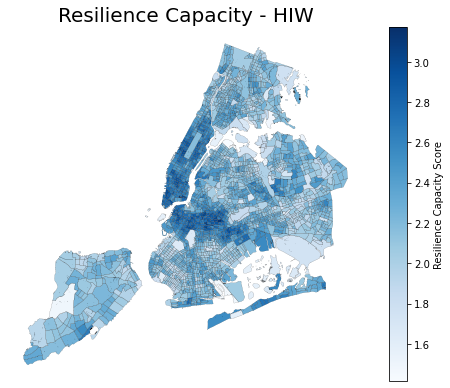

In [5]:
path_RCA = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\\RCA\RCA_{}_tract.shp'.format(hazard_name)
gdf_RCA = gpd.read_file(path_RCA)
RCA = URI.RCA(hazard_name=hazard_name, map_tract=gdf_RCA)

#
plotting.plot_RCA_nb('HIW', RCA.RCA_map)

## 4. Calculate URI Score
The URI equation is URI = ESL * SOV / RCA.  The result is clustered into a score of 1 (low) to 5 (high).

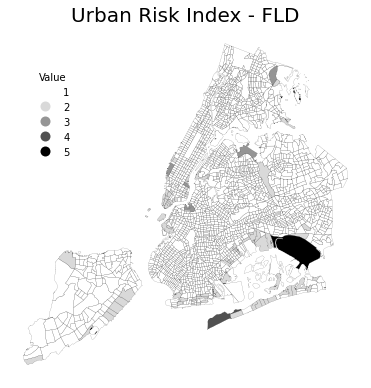

In [6]:
URI_HAZ = URI.URI(hazard_name=hazard_name, ESL=ESL, SOV=SOV, RCA=RCA)
URI_HAZ.calc_URI()

#save result
path_save = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\URI\URI_{}_tract.shp'.format(hazard_name, hazard_name)
URI_HAZ.URI_map.to_file(path_save)

plotting.plot_URI_nb(hazard_name, URI_HAZ.URI_map)
URI_HAZ.save_URI_FULL()
